In [1]:
!pip install fredapi


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500


from fredapi import Fred
fred_key = '41025c4035a46a9fa96e34da3ee63bf4'

# 1. Creating Fred Object

In [3]:
fred = Fred(api_key = fred_key)

# Search for Economic Data

In [4]:
fred.search('S&P', order_by = 'popularity')

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2022-11-10   2022-11-10   
CSUSHPINSA              CSUSHPINSA     2022-11-10   2022-11-10   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2022-11-10   2022-11-10   
SP500                        SP500     2022-11-10   2022-11-10   
CSUSHPISA                CSUSHPISA     2022-11-10   2022-11-10   
...                            ...            ...          ...   
GCT1502OR                GCT1502OR     2022-11-10   2022-11-10   
CRDQGRAPABIS          CRDQGRAPABIS     2022-11-10   2022-11-10   
DDDI06LKA156NWDB  DDDI06LKA156NWDB     2022-11-10   2022-11-10   
CTFPPPLKA669NRUG  CTFPPPLKA669NRUG     2022-11-10   2022-11-10   
GCT1502LA                GCT1502LA     2022-11-10   2022-11-10   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA          S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
SP500                                                       S&P 500   
CSUSHPISA           S&P/Case-Shiller U.S. National Home Price Index   
...                                                             ...   
GCT1502OR                    Bachelor's Degree or Higher for Oregon   
CRDQGRAPABIS      Total Credit to Private Non-Financial Sector, ...   
DDDI06LKA156NWDB           Central Bank Assets to GDP for Sri Lanka   
CTFPPPLKA669NRUG  Total Factor Productivity Level at Current Pur...   
GCT1502LA                 Bachelor's Degree or Higher for Louisiana   

                 observation_start observation_end                  frequency  \
series id                                                                       
BAMLH0A0HYM2            1996-12-31      2022-11-09               Daily, Close   
CSUSHPINSA              1987-01-01      2022-08-01                    Monthly   
BAMLH0A0HYM2EY          1996-12-31      2022-11-09               Daily, Close   
SP500                   2012-11-12      2022-11-09               Daily, Close   
CSUSHPISA               1987-01-01      2022-08-01                    Monthly   
...                            ...             ...                        ...   
GCT1502OR               2006-01-01      2021-01-01                     Annual   
CRDQGRAPABIS            1960-01-01      2022-01-01  Quarterly, End of Quarter   
DDDI06LKA156NWDB        1960-01-01      2019-01-01                     Annual   
CTFPPPLKA669NRUG        1954-01-01      2019-01-01                     Annual   
GCT1502LA               2006-01-01      2021-01-01                     Annual   

                 frequency_short               units         units_short  \
series id                                                                  
BAMLH0A0HYM2                   D             Percent                   %   
CSUSHPINSA                     M  Index Jan 2000=100  Index Jan 2000=100   
BAMLH0A0HYM2EY                 D             Percent                   %   
SP500                          D               Index               Index   
CSUSHPISA                      M  Index Jan 2000=100  Index Jan 2000=100   
...                          ...                 ...                 ...   
GCT1502OR                      A             Percent                   %   
CRDQGRAPABIS                   Q   Billions of Euros       Bil. of Euros   
DDDI06LKA156NWDB               A             Percent                   %   
CTFPPPLKA669NRUG               A       Index USA = 1       Index USA = 1   
GCT1502LA                      A             Percent                   %   

                      seasonal_adjustment seasonal_adjustment_short  \
series id                                                             
BAMLH0A0HYM2      Not Seasonally Adjusted                       

# Pulling Raw Data & Plotting for S&P

In [5]:
sp500 = fred.get_series(series_id = 'SP500')

<AxesSubplot: title={'center': 'S&P 500'}>

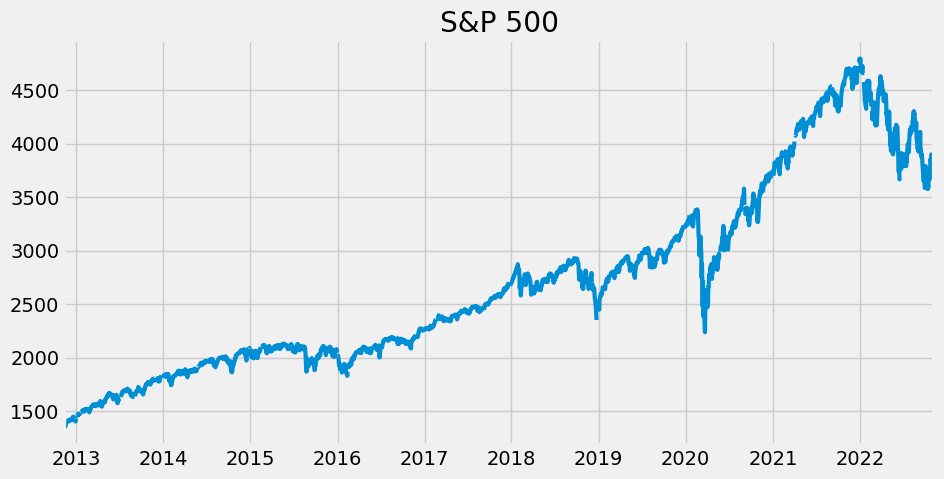

In [6]:
sp500.plot(figsize = (10, 5), title = 'S&P 500', lw = 3)

# Pulling and Joining multiple data series

<AxesSubplot: >

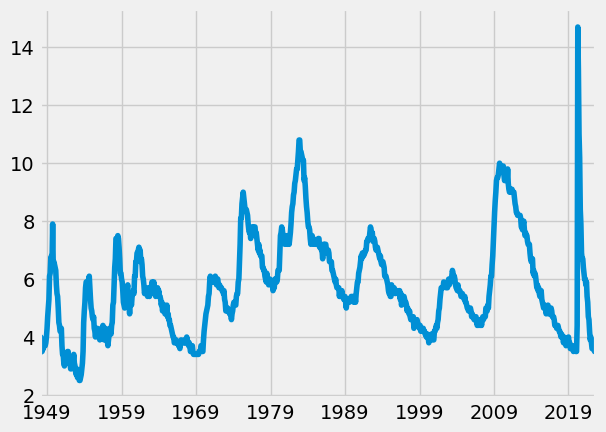

In [7]:
fred.search('unemployment')
unrate = fred.get_series(series_id = 'UNRATE')
unrate.plot()

In [77]:
unemp_df = fred.search('unemployment rate state', filter = ('frequency', 'Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

Index(['UNRATE', 'LNS14000006', 'LNS14000031', 'CAUR', 'M0892AUSM156SNBR',
       'M0892BUSM156SNBR', 'LNS14000024', 'TXUR', 'LNS14000002', 'FLUR',
       'NYUR', 'U2RATE', 'LNS14000009', 'LNS14027662', 'LNS14000003',
       'LNS14000001', 'OHUR', 'MIUR', 'LNS14027660', 'PAUR', 'ALUR', 'MNUR',
       'ILUR', 'LRUN64TTUSM156S', 'KYUR', 'WIUR', 'NCUR', 'AKUR', 'MAUR',
       'INUR', 'MOUR', 'COUR', 'AZUR', 'NJUR', 'TNUR', 'VAUR', 'GAUR',
       'LNS14032183', 'LASMT261982000000003', 'WVUR', 'LNS14027659', 'LAUR',
       'OKUR', 'SCUR', 'NMUR', 'NDUR', 'ORUR', 'UTUR', 'LNS14000012', 'ARUR',
       'HIUR', 'WAUR', 'NVUR', 'KSUR', 'LNS14000060', 'IAUR',
       'LASMT391746000000003', 'MEUR', 'SDUR', 'CTUR', 'MDUR', 'IDUR',
       'LNS14000032', 'WYUR', 'MSUR', 'LNS14000018', 'LNS14024887',
       'LNS14000028', 'DCUR', 'CMWRUR', 'MTUR', 'LNS14000036', 'NEUR',
       'LRHUTTTTUSM156S', 'PRUR', 'CNERUR', 'NHUR', 'DEUR', 'RIUR',
       'LNS14027689', 'VTUR', 'CSOUUR', 'CWSTUR', 'LRUN24TTUSM156

In [78]:
total_results = []
for myid in unemp_df.index:
    results = fred.get_series(myid)
    results.to_frame(name = myid)
    total_results.append(results)
    time.sleep(0.1)
unemp_results = pd.concat(total_results, axis = 1)

In [79]:
unemp_states = unemp_results.drop(0, axis = 1)
px.line(unemp_states)

# Pull Unemployment Rate data for each state during 2020

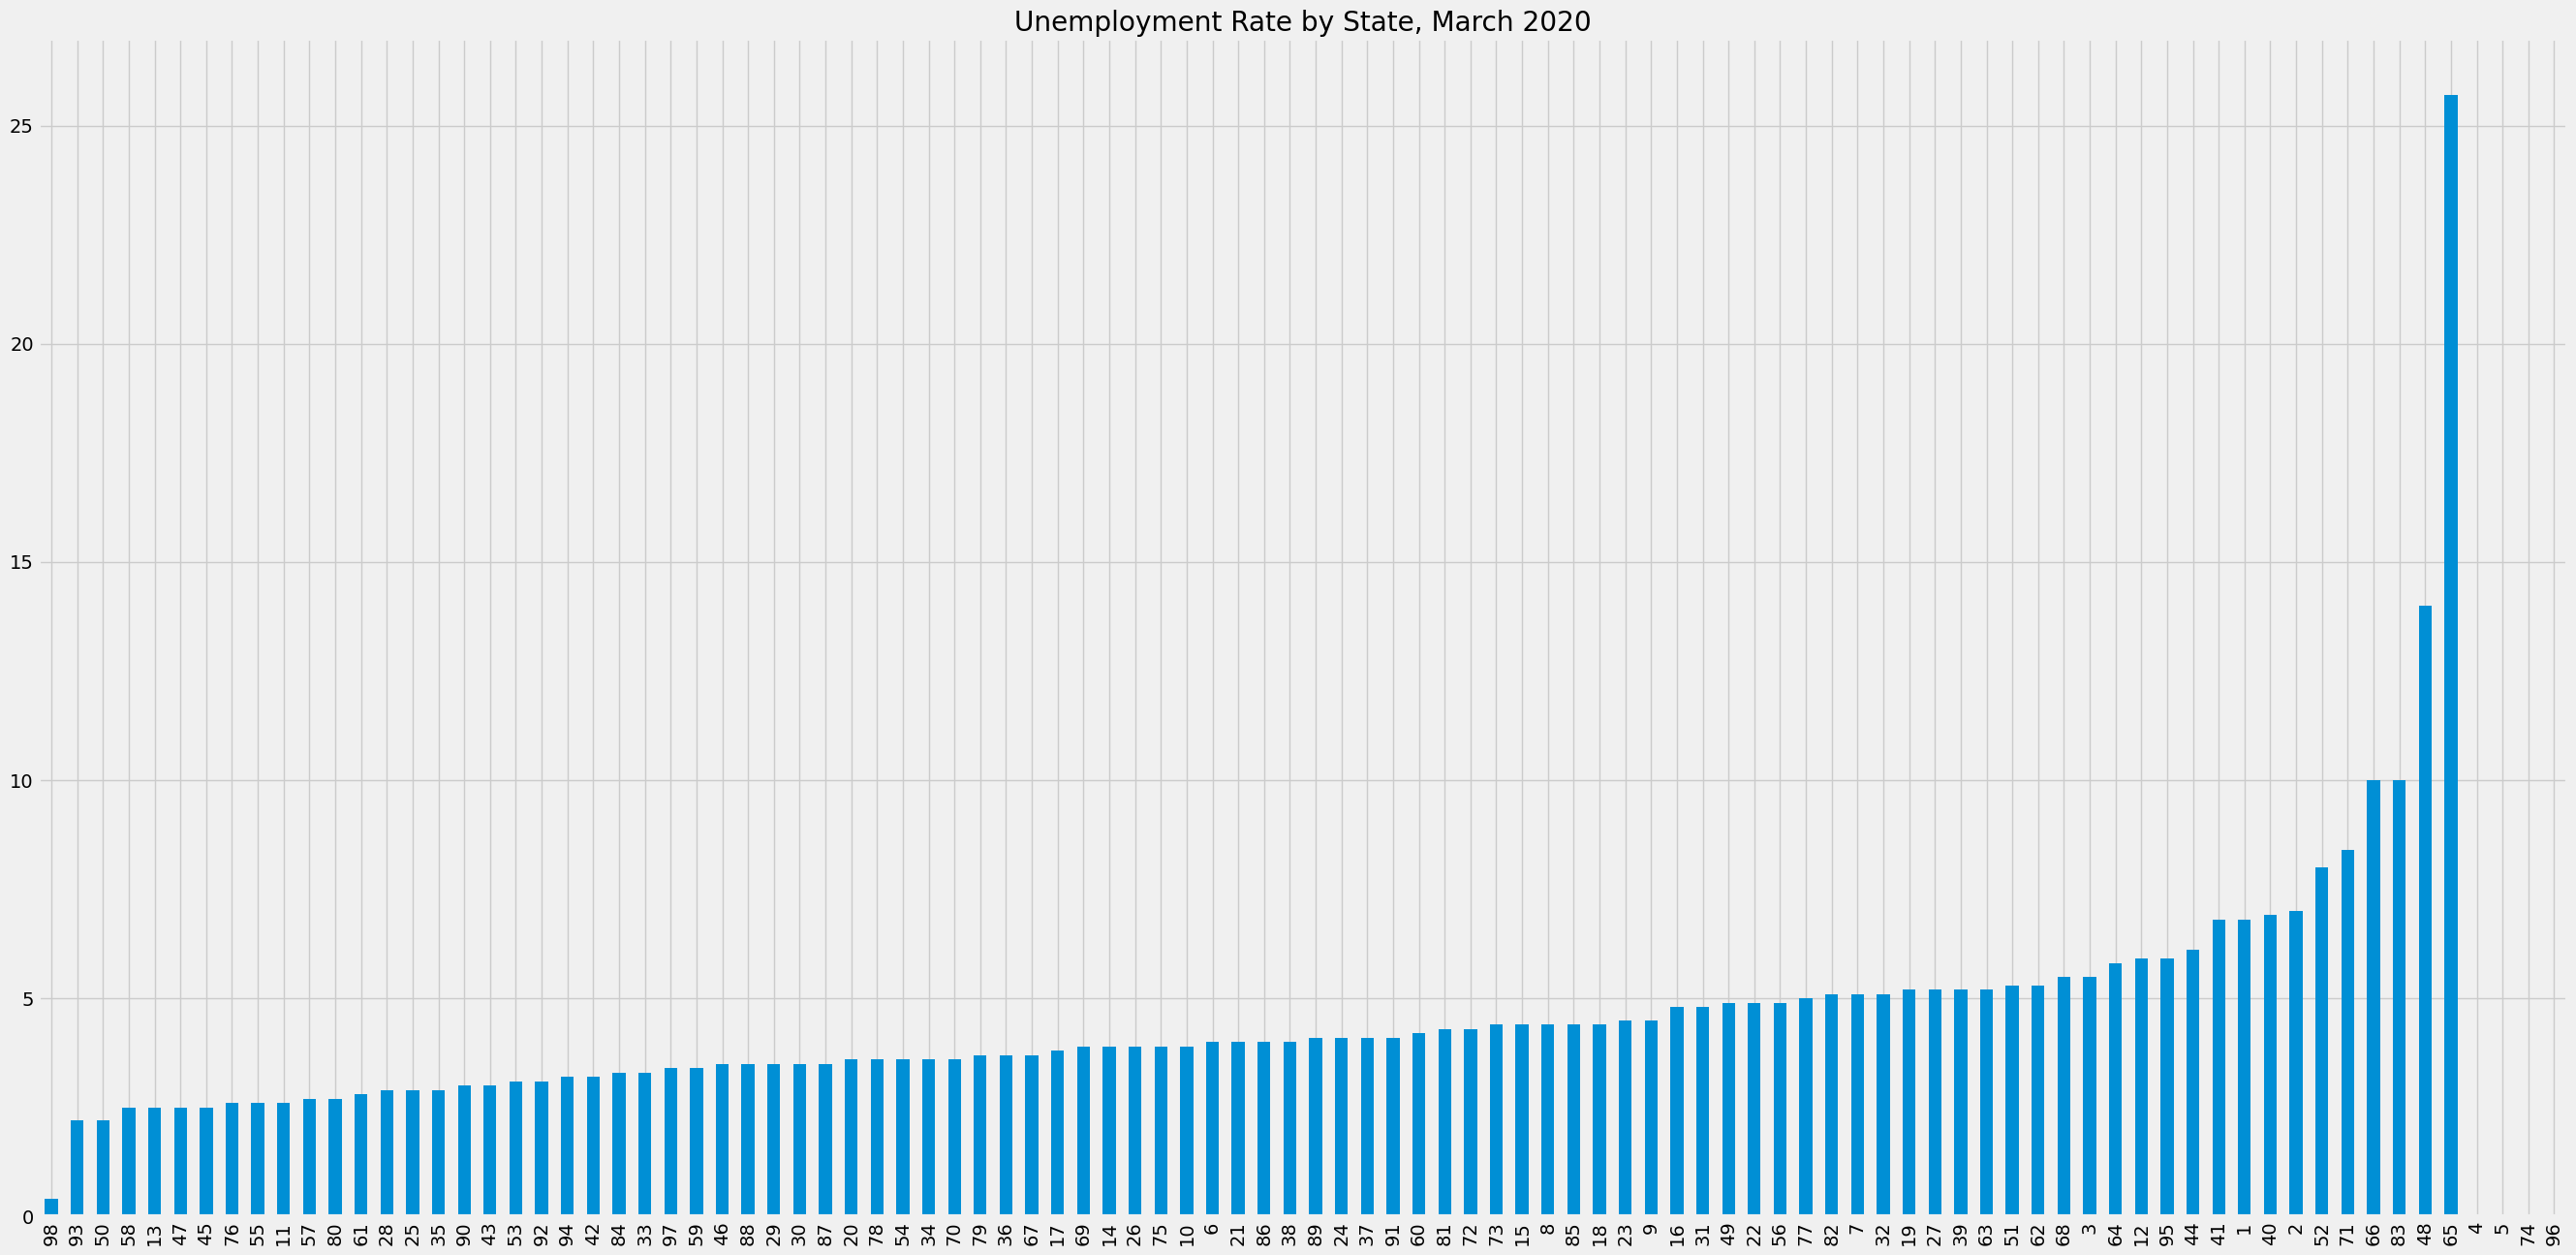

In [80]:
fig = unemp_states.loc[unemp_states.index == '2020-03-01'].T \
    .sort_values('2020-03-01') \
    .plot(kind = 'bar', figsize = (30, 15), title = "Unemployment Rate by State, March 2020")

fig.legend().remove()
plt.show()